## 6.5 - unsupervised machine learning

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering
#### 4. Observations

### 1. Import libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = r'/Users/jakubkondelka/Documents/JK_USkillings'

In [6]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'USkillings_initcleaned.pkl'))

In [7]:
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [84]:
# create a subset with only numerical variables
dsub = df[['Year', 'Incident', 'Victim Count', 'Perpetrator Count', 'Victim Age', 'Perpetrator Age']]

In [85]:
dsub.head()

,Year,Incident,Victim Count,Perpetrator Count,Victim Age,Perpetrator Age
0,1980,1,0,0,14,15.0
1,1980,1,0,0,43,42.0
2,1980,2,0,0,30,0.0
3,1980,1,0,0,43,42.0
4,1980,2,0,1,30,0.0


### 2. The Elbow technique

In [89]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [90]:
score = [kmeans[i].fit(dsub).score(dsub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-526198962.2136887,
 -307426328.6419952,
 -233633701.37421346,
 -170149871.9636,
 -146531788.79350197,
 -128518200.58689782,
 -113040183.20881666,
 -103109759.91951819,
 -94894413.29387592]

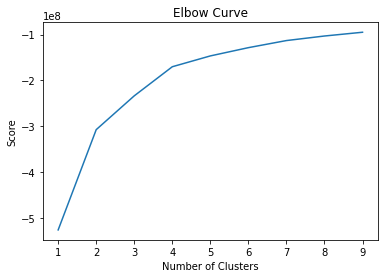

In [91]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### the right number of clusters is 3 (or 4), based on the start of the flattening of the curve

### 3. clusterring using k-means algorithm

In [92]:
# Create the k-means object using 3 clusters

kmeans = KMeans(n_clusters = 3) 

In [93]:
# Fit the k-means object to the data.

kmeans.fit(dsub)

KMeans(n_clusters=3)

In [94]:
dsub['clusters'] = kmeans.fit_predict(dsub)

In [95]:
dsub['clusters'].value_counts()

1    247496
0    142161
2      8144
Name: clusters, dtype: int64

In [96]:
dsub.head()

,Year,Incident,Victim Count,Perpetrator Count,Victim Age,Perpetrator Age,clusters
0,1980,1,0,0,14,15.0,1
1,1980,1,0,0,43,42.0,0
3,1980,1,0,0,43,42.0,0
5,1980,1,0,0,30,36.0,1
6,1980,2,0,0,42,27.0,0


In [97]:
dsub['Perpetrator Age'].describe()

count    397801.000000
mean         29.707087
std          11.051424
min          11.000000
25%          21.000000
50%          27.000000
75%          36.000000
max          64.000000
Name: Perpetrator Age, dtype: float64

In [86]:
# remove excess values in Victim age. Max age is 80
dsub = dsub[dsub['Victim Age'] < 80]

In [87]:
# remove excess values in Perpetrator Age . Max age is 65
dsub = dsub[dsub['Perpetrator Age'] < 65] 
dsub = dsub[dsub['Perpetrator Age'] > 10] 

In [88]:
# remove excess values in Incident. Max is 400
dsub = dsub[dsub['Incident'] < 400]

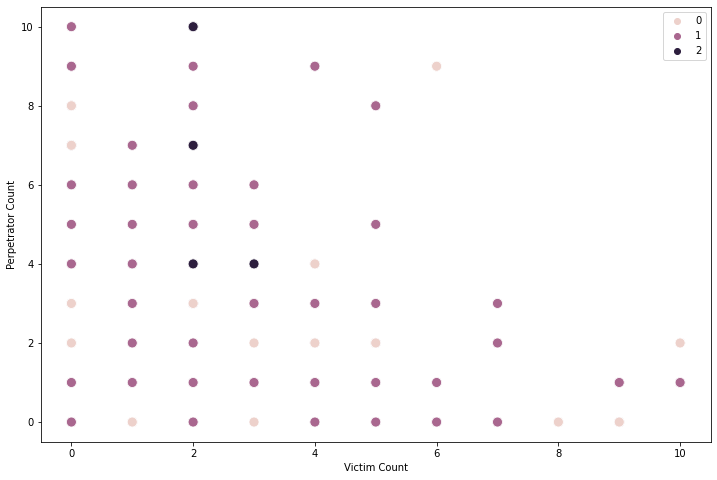

In [98]:
# Plot the clusters for the "Victim Count" and "Perpetrator Count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dsub['Victim Count'], y=dsub['Perpetrator Count'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Victim Count') # Label x-axis.
plt.ylabel('Perpetrator Count') # Label y-axis.
plt.show()

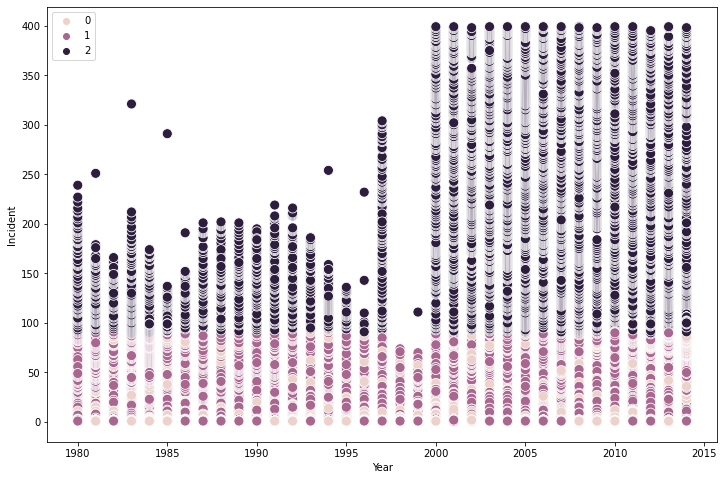

In [99]:
# Plot the clusters for the "Year" and "Incident" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dsub['Year'], y=dsub['Incident'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Incident') # Label y-axis.
plt.show()

/Users/jakubkondelka/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


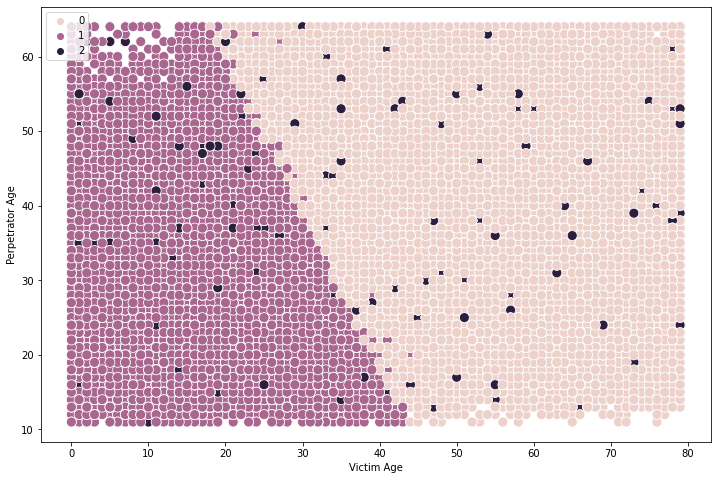

In [103]:
# Plot the clusters for the "Victim Age" and "Victim Count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=dsub['Victim Age'], y=dsub['Perpetrator Age'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Victim Age') # Label x-axis.
plt.ylabel('Perpetrator Age') # Label y-axis.
plt.show()

In [104]:
dsub.loc[dsub['clusters'] == 2, 'cluster'] = 'dark purple'
dsub.loc[dsub['clusters'] == 1, 'cluster'] = 'purple'
dsub.loc[dsub['clusters'] == 0, 'cluster'] = 'pink'

In [105]:
dsub.groupby('cluster').agg({'Victim Age':['mean', 'median'], 
                         'Perpetrator Age':['mean', 'median'], 
                         'Victim Count':['mean', 'median'],
                          'Perpetrator Count':['mean', 'median']})

Victim Age        Perpetrator Age        Victim Count         \
                  mean median            mean median         mean median   
cluster                                                                    
dark purple  31.230108   28.0       28.839882   26.0     0.078217    0.0   
pink         46.876513   45.0       37.166459   37.0     0.132976    0.0   
purple       22.757782   23.0       25.450981   24.0     0.137348    0.0   

            Perpetrator Count         
                         mean median  
cluster                               
dark purple          0.279101    0.0  
pink                 0.174239    0.0  
purple               0.285730    0.0

### 4. Observations - as in previous exercises, because the relationships are not correlated, there is not very much use possible
#### Based on the aggregate table below for example, the mean of victim age and perpetrator age in each cluster is similar, meaning that incidents happen between similar age groups
#### I will not be applying this in furher analysis, as there is no clear message that this provides